In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

In [4]:
train_df = pd.read_csv("train.csv")
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
train_df.shape

(614, 13)

# columns info
<b>Loan_id</b> ........... (object) : unique alphanumerical code for each loan  
<b>Gender</b> ............ (object) : Male or Female  
<b>Married</b> ........... (object) : Yes or No  
<b>Dependents</b> ........ (object) : 0, 1, 2, 3+   
<b>Education</b> ......... (object) : 'Graduate' or 'Not Graduate'  
<b>Self_Employed</b> ..... (object) : Yes or No  
<b>ApplicantIncome</b> ... (int64)  : Income assumed to be annual and in thousand dollars  
<b>CoapplicantIncome</b> . (float64): Also assumed to be annual and in thousand dollars  
<b>LoanAmount</b> ........ (float64): Requested loan thousand dollars  
<b>Loan_Amount_Term</b> .. (float64): Term of loan in months  
<b>Credit_History</b> .... (float64): 1.0 if available, 0.0 if not  
<b>Property_Area</b> ..... (object) : 'Urban', 'Rural', 'Semiurban'  
<b>Loan_Status</b> ....... (object) : Y or N  

In [6]:
train_df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### Proposed Approach to Null Values
Dependents - make '0'  
Self_Employed - make 'Yes'  
LoanAmount - make MEAN  
Loan_Amount_Term - make 360.0  
Credit_History - make 0.0  
Gender - delete  
Married - delete  

In [7]:
train_df = train_df.loc[train_df['Gender'].notnull()]
#Removed all rows with NaN in Gender

In [8]:
train_df = train_df.loc[train_df['Married'].notnull()]
#Removed all rows with NaN in Married

In [9]:
train_df.loc[train_df['Dependents'].isnull(),'Dependents'] = '0'
#Missing values in Dependets are assigned as '0'

In [10]:
train_df.loc[train_df['Credit_History'].isnull(), 'Credit_History'] = 0.0
#Missing values in Credit_History are assigned to 0

In [11]:
train_df.loc[train_df['Self_Employed'].isnull(), 'Self_Employed'] = 'Yes'
#Missing values for Self_Employed are assigned as Yes

In [12]:
train_df.loc[train_df['Loan_Amount_Term'].isnull(), 'Loan_Amount_Term'] = 360.0
#Missing values for Loan_Amount_Term are assigned as 360.0

In [13]:
ave_loan = train_df['LoanAmount'].mean()
ave_loan

144.9688041594454

In [14]:
train_df.loc[train_df['LoanAmount'].isnull(), 'LoanAmount'] = ave_loan
#Missing values in LoanAmount are given the mean value

In [15]:
train_df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [16]:
%matplotlib inline

In [18]:
train_df['Loan_Approved'] = 0
train_df.loc[train_df['Loan_Status']=='Y', 'Loan_Approved'] = 1

#Create a 'Loan_Approved' column with numeric values. 1 if Y, 0 if N

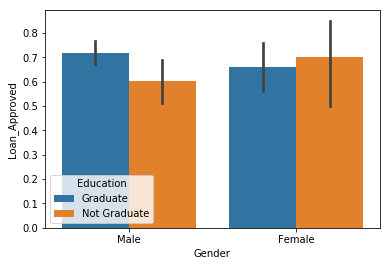

In [30]:
fig = sns.barplot(data=train_df, x='Gender', y='Loan_Approved', hue='Education')
plt.show()

### Observations:
1.) Gender, on its own, does not seem to affect loan status  
2.) Dependents, on its own, does not seem to affect loan status  
3.) For Women, having 3+ dependents seem to have negatively affect chances of loan approval. The number of dependents seem to not be affecting chances on males.  
4.) Non-married applicants have a <b>very slightly </b> lower chance of having loans approved (for both genders and any number of dependents)  
5.) Education seem to have a slight impact for males, but none for females.  
6.) ApplicantIncome, on its own, does not seem to affect chances  
7.) Loan Amount and Term, on their own, do not seem to affect chances  
8.) 

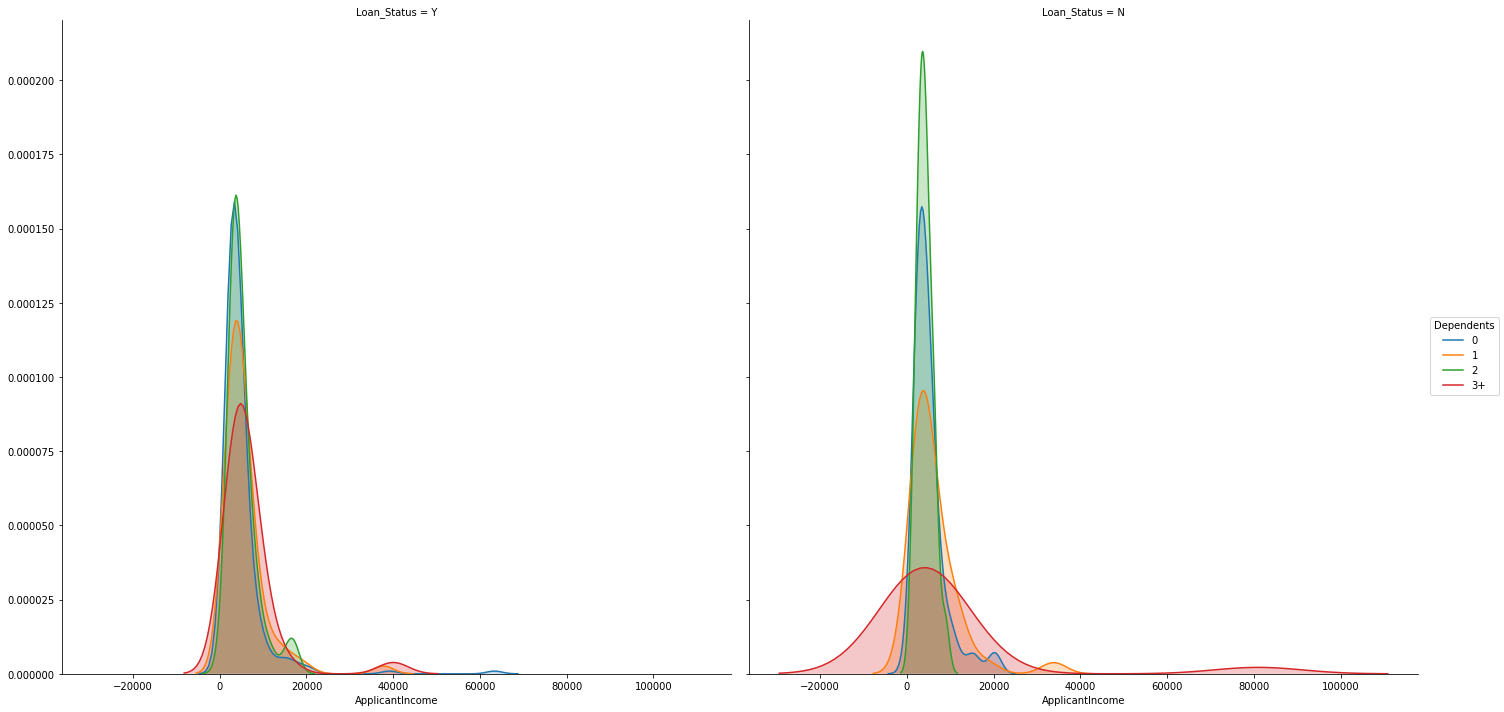

In [69]:
fig = sns.FacetGrid(train_df, hue='Dependents', col='Loan_Status', size=10)
fig.map (sns.kdeplot, 'ApplicantIncome', shade=True).add_legend()
plt.show()

In [58]:
train_df['Loan_Amount_Term'].astype('float64', copy=False)

0      360.0
1      360.0
2      360.0
3      360.0
4      360.0
5      360.0
6      360.0
7      360.0
8      360.0
9      360.0
10     360.0
11     360.0
12     360.0
13     360.0
14     120.0
15     360.0
16     240.0
17     360.0
18     360.0
19     360.0
20     360.0
21     360.0
22     360.0
24     360.0
25     360.0
26     360.0
27     360.0
28     360.0
29     360.0
30     360.0
       ...  
582    360.0
583    360.0
584    360.0
585     84.0
586    360.0
587    360.0
589    360.0
590    180.0
591    240.0
593    180.0
594    360.0
595    360.0
596    360.0
597    360.0
598    360.0
599    360.0
600    180.0
601    360.0
602    360.0
603    360.0
604    360.0
605    180.0
606    360.0
607    360.0
608    360.0
609    360.0
610    180.0
611    360.0
612    360.0
613    360.0
Name: Loan_Amount_Term, Length: 598, dtype: float64